In [1]:
pip install pycaret

In [2]:
# check installed version
import pycaret
pycaret.__version__

'3.2.0'

In [3]:
import pandas as pd

In [4]:
train_df = pd.read_csv('/content/train.csv')
train_new_df = pd.read_csv('/content/train_new.csv')
oil_df = pd.read_csv('/content/oil.csv')
store_df = pd.read_csv('/content/stores.csv')
holiday_events_df = pd.read_csv('/content/holidays_events.csv')
test_df = pd.read_csv('/content/test.csv')
sample_submission_df = pd.read_csv('/content/sample_submission.csv')
transactions_df = pd.read_csv('/content/transactions.csv')

In [5]:
### loading sample dataset from pycaret dataset module
from pycaret.datasets import get_data
data = pycaret.datasets.get_data('train_new')

,date,sales
0,2013-01-01,0
1,2013-01-02,2
2,2013-01-03,3
3,2013-01-04,3
4,2013-01-05,5


In [6]:
train_new_df.head()

,date,sales
0,2013-01-01,0
1,2013-01-02,2
2,2013-01-03,3
3,2013-01-04,3
4,2013-01-05,5


In [7]:
train_new_df.dtypes

date     object
sales     int64
dtype: object

In [8]:
train_new_df.set_index('date')

,sales
date,
2013-01-01,0
2013-01-02,2
2013-01-03,3
2013-01-04,3
2013-01-05,5
...,...
2014-08-09,4
2014-08-10,0
2014-08-11,0


In [9]:
train_new_df.dtypes

date     object
sales     int64
dtype: object

<AxesSubplot: >

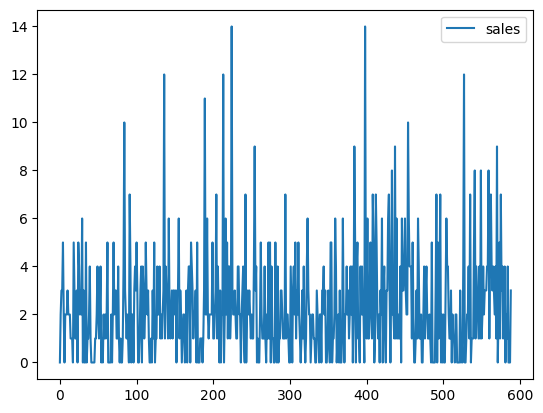

In [10]:
# plot the dataset
data.plot()

In [11]:
import pandas as pd
train_new_df.loc[:, "date"] = pd.to_datetime(train_new_df["date"])


Setup


This function initializes the training environment and creates the transformation pipeline. Setup function must be called before executing any other function in PyCaret. Setup has only one required parameter i.e. data. All the other parameters are optional.

In [37]:
# import pycaret time series and init setup
from pycaret.time_series import *
#s = pycaret.time_series.setup(train_new_df, fh = 3, session_id = 123, target = 'sales')
s = setup(train_new_df,session_id = 123, target = 'sales')

,Description,Value
0,session_id,123
1,Target,sales
2,Approach,Univariate
3,Exogenous Variables,Present
4,Original data shape,"(589, 2)"
5,Transformed data shape,"(589, 2)"
6,Transformed train set shape,"(588, 2)"
7,Transformed test set shape,"(1, 2)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [38]:
# import TSForecastingExperiment and init the class
from pycaret.time_series import TSForecastingExperiment
exp = TSForecastingExperiment()

In [39]:
# check the type of exp
type(exp)

pycaret.time_series.forecasting.oop.TSForecastingExperiment

In [40]:
# init setup on exp
exp.setup(train_new_df, fh = 3, session_id = 123,target = 'sales')

,Description,Value
0,session_id,123
1,Target,sales
2,Approach,Univariate
3,Exogenous Variables,Present
4,Original data shape,"(589, 2)"
5,Transformed data shape,"(589, 2)"
6,Transformed train set shape,"(586, 2)"
7,Transformed test set shape,"(3, 2)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


Check Stats

The check_stats function is used to get summary statistics and run statistical tests on the original data or model residuals.

In [41]:
# check statistical tests on original data
check_stats()

,Test,Test Name,Data,Property,Setting,Value
0,Summary,Statistics,Transformed,Length,,589.0
1,Summary,Statistics,Transformed,# Missing Values,,0.0
2,Summary,Statistics,Transformed,Mean,,2.332767
3,Summary,Statistics,Transformed,Median,,2.0
4,Summary,Statistics,Transformed,Standard Deviation,,2.206506
5,Summary,Statistics,Transformed,Variance,,4.868669
6,Summary,Statistics,Transformed,Kurtosis,,4.42256
7,Summary,Statistics,Transformed,Skewness,,1.673375
8,Summary,Statistics,Transformed,# Distinct Values,,14.0
9,White Noise,Ljung-Box,Transformed,Test Statictic,"{'alpha': 0.05, 'K': 24}",57.753785


Compare Models

This function trains and evaluates the performance of all the estimators available in the model library using cross-validation. The output of this function is a scoring grid with average cross-validated scores. Metrics evaluated during CV can be accessed using the get_metrics function. Custom metrics can be added or removed using add_metric and remove_metric function.

In [42]:
# compare baseline models
best = compare_models()

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,TT (Sec)
naive,Naive Forecaster,0.6463,0.4678,1.3333,1.3333,6004799503160661.0000,0.6667,0.0567
stlf,STLF,1.0621,0.7684,2.1877,2.1877,9852562181110106.0000,2.0000,0.0867
grand_means,Grand Means Forecaster,1.1354,0.8215,2.3396,2.3396,10536599106085812.0000,2.0000,0.0467
croston,Croston,1.3791,0.9979,2.8419,2.8419,12798558560697696.0000,2.0000,0.0367


Processing:   0%|          | 0/101 [00:00<?, ?it/s]

In [43]:
# compare models using OOP
exp.compare_models()

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
stlf,STLF,0.4497,0.3933,0.9283,1.1218,810291714816867.3750,0.6957,0.4321,0.1433
naive,Naive Forecaster,0.6998,0.5586,1.4444,1.5931,2001599834386888.0000,0.8540,-0.1081,0.0733
grand_means,Grand Means Forecaster,0.7017,0.5547,1.4481,1.5819,2345815337934523.0000,0.8323,-0.0677,0.0500
snaive,Seasonal Naive Forecaster,0.7537,0.7309,1.5556,2.0839,1000799917193444.0000,0.5987,-0.9080,0.1000
croston,Croston,0.8437,0.6876,1.7414,1.9610,3061875507735228.0000,0.8640,-0.6806,0.0567


Processing:   0%|          | 0/101 [00:00<?, ?it/s]

STLForecaster(sp=14)

Analyze Model

You can use the plot_model function to analyzes the performance of a trained model on the test set. It may require re-training the model in certain cases.

In [44]:
# plot forecast
plot_model(best, plot = 'forecast')

In [45]:
# plot forecast for 36 months in future
plot_model(best, plot = 'forecast', data_kwargs = {'fh' : 36})

In [46]:
# residuals plot
plot_model(best, plot = 'residuals')

Prediction

The predict_model function returns y_pred. When data is None (default), it uses fh as defined during the setup function.

In [47]:
# predict on test set
holdout_pred = predict_model(best)

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE
0,Naive Forecaster,1.4532,1.0521,3.0000,3.0000,1.0000,2.0000


In [48]:
# show predictions df
holdout_pred.head()

,y_pred
588,0.0


In [49]:
# generate forecast for 36 period in future
predict_model(best, fh = 36)

,y_pred
588,0.0
589,0.0
590,0.0
591,0.0
592,0.0
593,0.0
594,0.0
595,0.0
596,0.0
597,0.0


In [50]:
# check available models
models()

,Name,Reference,Turbo
ID,,,
naive,Naive Forecaster,sktime.forecasting.naive.NaiveForecaster,True
grand_means,Grand Means Forecaster,sktime.forecasting.naive.NaiveForecaster,True
snaive,Seasonal Naive Forecaster,sktime.forecasting.naive.NaiveForecaster,True
arima,ARIMA,sktime.forecasting.arima.ARIMA,True
auto_arima,Auto ARIMA,sktime.forecasting.arima.AutoARIMA,True
stlf,STLF,sktime.forecasting.trend.STLForecaster,True
croston,Croston,sktime.forecasting.croston.Croston,True
lr_cds_dt,Linear w/ Cond. Deseasonalize & Detrending,pycaret.containers.models.time_series.BaseCdsD...,True
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,pycaret.containers.models.time_series.BaseCdsD...,True


In [51]:
compare_ts_models = compare_models(include = ['naive', 'snaive', 'grand_means'])

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,TT (Sec)
naive,Naive Forecaster,0.6463,0.4678,1.3333,1.3333,6004799503160661.0000,0.6667,0.0633
grand_means,Grand Means Forecaster,1.1354,0.8215,2.3396,2.3396,10536599106085812.0000,2.0000,0.0433


Processing:   0%|          | 0/17 [00:00<?, ?it/s]

In [52]:
compare_ts_models

NaiveForecaster()

In [53]:
compare_ts_models_results = pull()
compare_ts_models_results

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,TT (Sec)
naive,Naive Forecaster,0.6463,0.4678,1.3333,1.3333,6.004800e+15,0.6667,0.0633
grand_means,Grand Means Forecaster,1.1354,0.8215,2.3396,2.3396,1.053660e+16,2.0000,0.0433


In [59]:
#best_mae_models_top3 = compare_models(sort = 'R2', n_select = 3)

In [60]:
# list of top 3 models by MAE
#best_mae_models_top3

In [57]:
models()

,Name,Reference,Turbo
ID,,,
naive,Naive Forecaster,sktime.forecasting.naive.NaiveForecaster,True
grand_means,Grand Means Forecaster,sktime.forecasting.naive.NaiveForecaster,True
snaive,Seasonal Naive Forecaster,sktime.forecasting.naive.NaiveForecaster,True
arima,ARIMA,sktime.forecasting.arima.ARIMA,True
auto_arima,Auto ARIMA,sktime.forecasting.arima.AutoARIMA,True
stlf,STLF,sktime.forecasting.trend.STLForecaster,True
croston,Croston,sktime.forecasting.croston.Croston,True
lr_cds_dt,Linear w/ Cond. Deseasonalize & Detrending,pycaret.containers.models.time_series.BaseCdsD...,True
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,pycaret.containers.models.time_series.BaseCdsD...,True
